## Chapter 4

In [ ]:
!wget https://nlp100.github.io/data/neko.txt

--2023-05-11 02:07:44--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.109.153, 185.199.111.153, 185.199.108.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.07s   

2023-05-11 02:07:44 (13.9 MB/s) - ‘neko.txt’ saved [975789/975789]



In [ ]:
!apt install mecab libmecab-dev mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,373 kB of archives.
After this operation, 60.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libmecab2 amd64 0.996-10build1 [233 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libmecab-dev amd64 0.996-10build1 [285 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 mecab-utils amd64 0.996-10build1 [4,912 B]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 mecab-ipadic all 2.7.0-20070801+main-2.1 [6,714 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/universe amd64 mecab amd64 0.996-10build1 [132 kB]
Get:6 http://archive.ubuntu.c

In [ ]:
!mecab -o ./neko.txt.mecab ./neko.txt

In [ ]:
!wc -l ./neko.txt.mecab 

226266 ./neko.txt.mecab


In [ ]:
!head -15 ./neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
	記号,一般,*,*,*,*,*
EOS
	記号,一般,*,*,*,*,*
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
	記号,一般,*,*,*,*,*
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ


### 4-30

In [ ]:
filename = './neko.txt.mecab'

with open(filename, 'r',) as f:
  text = f.read().split('\n')

morphs = []

for line in text:
  if line != 'EOS':
    ls = line.split('\t')
    if len(ls) != 2 or ls[0] == '':
        continue
    tmp = ls[1].split(',')
    d = {}
    d ={'surface':ls[0], 'base':tmp[6], 'pos':tmp[0], 'pos1':tmp[1]}
    morphs.append(d)

print(morphs[:20])
print(type(morphs))

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}, {'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base': '生れる'

In [ ]:
print(morphs[2])
print(type(morphs[2]))
print(morphs[2]["base"])

{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
<class 'dict'>
吾輩


### 4-31

In [ ]:
verb_sur = set() #set型を使う

#表層形を追加していく
for line in morphs:
  if line["pos"] == "動詞":
    verb_sur.add(line['surface'])

#最初の五つを表示
for v in list(verb_sur)[:5]:
  print(v)

#動詞の数を表示（重複無し）
print(len(verb_sur))

申し
動かさ
なぐりつける
名乗っ
春めい
3893


### 4-32

In [ ]:
verb_bas = set()

#基本形を追加していく
for line in morphs:
  if line["pos"] == "動詞":
    verb_bas.add(line["base"])

#最初の五つを表示
for v in list(verb_bas)[:5]:
  print(v)

#動詞の基本形の数を表示（重複無し）
print(len(verb_bas))

撮る
なぐりつける
帰す
反す
換える
2300


### 4-33

In [ ]:
nono = set()

# 「AのB」を抽出して追加
for i in range(1, len(morphs)-1):
  if morphs[i-1]["pos"] == "名詞" and morphs[i]['surface'] == 'の' and morphs[i + 1]['pos'] == '名詞':
      nono.add(morphs[i - 1]['surface'] + morphs[i]['surface'] + morphs[i + 1]['surface'])

#最初の五つを表示
for n in list(nono)[:5]:
  print(n)

#数を表示
print(len(nono))

猫の態度
舞台の役者
相当の気焔
メリンスの座布団
本来の面目
4925


### 4-34

In [ ]:
noun_con = set()

#連接を抽出して追加
con = ""
num = 0 #名詞数

for line in morphs:
  # 名詞が来たら接続、名詞数を増やす
  if line["pos"] == "名詞":
    con += line['surface']
    num += 1

  # 名詞数が2以上（連接している）かつ、それ以上名詞が続かない
  elif num >= 2:
    noun_con.add(con)
    con = ""
    num = 0
  
  else:
    con = ""
    num = 0

#最初の五つを表示
for n in list(noun_con)[:5]:
  print(n)

#連接名詞の数
print(len(noun_con))


功果
三ダース
何ん
中質
富子嬢
4457


### 4-35

In [ ]:
from collections import Counter

surface =  [d['surface'] for d in morphs]
c = Counter(surface)
print (c.most_common())
print(type(c.most_common()))

[('の', 9194), ('。', 7486), ('て', 6868), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('と', 5508), ('が', 5337), ('た', 3988), ('で', 3806), ('「', 3231), ('」', 3225), ('も', 2479), ('ない', 2390), ('だ', 2363), ('し', 2322), ('から', 2032), ('ある', 1728), ('な', 1613), ('ん', 1568), ('か', 1530), ('いる', 1249), ('事', 1207), ('へ', 1034), ('う', 992), ('する', 992), ('もの', 981), ('君', 973), ('です', 973), ('云う', 937), ('主人', 932), ('よう', 696), ('ね', 683), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('なる', 531), ('さ', 514), ('よ', 509), ('なら', 483), ('吾輩', 481), ('い', 478), ('ます', 458), ('じゃ', 448), ('…', 433), ('これ', 414), ('\u3000', 411), ('なっ', 404), ('それ', 381), ('来', 364), ('れ', 356), ('見', 350), ('でも', 346), ('時', 345), ('迷亭', 343), ('ませ', 330), ('いい', 320), ('三', 319), ('——', 319), ('まで', 313), ('ところ', 313), ('方', 312), ('二', 303), ('ず', 299), ('上', 294), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('先生', 274), ('見る', 273), ('人間', 272),

### 4-36

In [ ]:
!pip install japanize_matplotlib

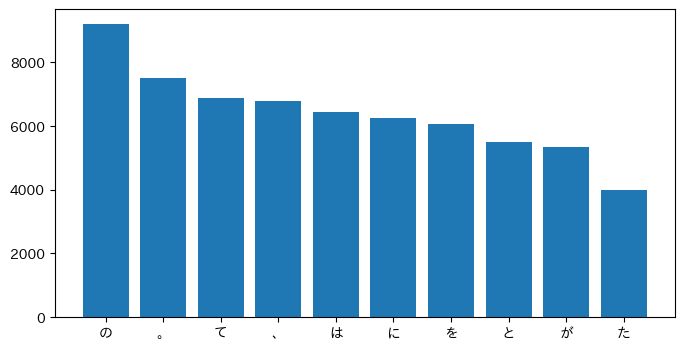

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

keys = [a[0] for a in c.most_common(10)]
values = [a[1] for a in c.most_common(10)]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

### 4-37

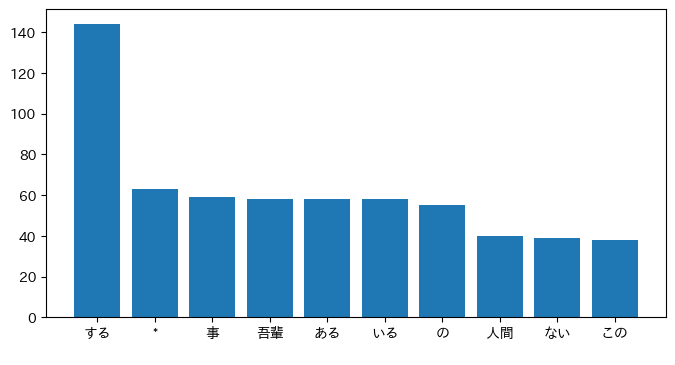

In [ ]:
from collections import defaultdict

# 共起語を知りたいので、文単位のリストを用意する。
sentences = []
sent_morphs = []
with open(filename, mode='r') as f:
  for line in f:  # 1行ずつ読込
    if line != 'EOS\n':  # 文末以外：形態素解析情報を辞書型に格納して形態素リストに追加
      fields = line.split('\t')
      if len(fields) != 2 or fields[0] == '':  # 文頭以外の空白と改行文字はスキップ
        continue
      else:
        attr =  fields[1].split(',')
        morph = {'surface': fields[0], 'base': attr[6], 'pos': attr[0], 'pos1': attr[1]}
        sent_morphs.append(morph)
    else:  # 文末：形態素リストを文リストに追加
      sentences.append(sent_morphs)
      sent_morphs = []

ans = defaultdict(int)
for sentence in sentences:
  if '猫' in [morph['surface'] for morph in sentence]:  # 文章の形態素に「猫」が含まれる場合のみ辞書に追加
    for morph in sentence:
      if morph['pos'] != '記号' and morph['pos'] != '助詞' and morph['pos'] != '助動詞':
        ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
del ans['猫']
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

keys = [a[0] for a in ans[0:10]]
values = [a[1] for a in ans[0:10]]
plt.figure(figsize=(8, 4))
plt.bar(keys, values)
plt.show()

### 4-38

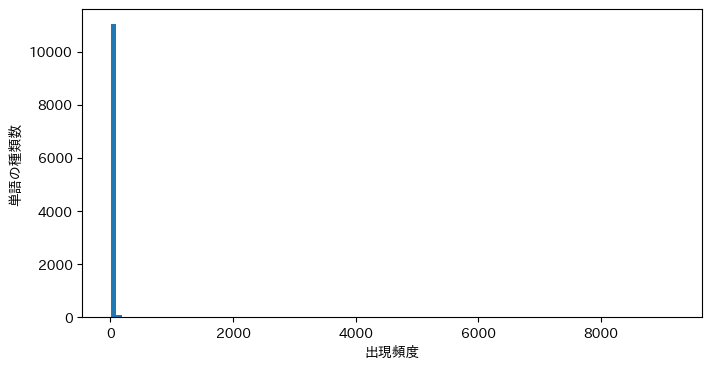

In [ ]:
ans = defaultdict(int)

for morph in morphs:
  if morph['pos'] != '記号':
    ans[morph['base']] += 1  # 単語数の更新(初登場の単語であれば1をセット)
ans = ans.values()

plt.figure(figsize=(8, 4))
plt.hist(ans, bins=100)
plt.xlabel('出現頻度')
plt.ylabel('単語の種類数')
plt.show()

### 4-39

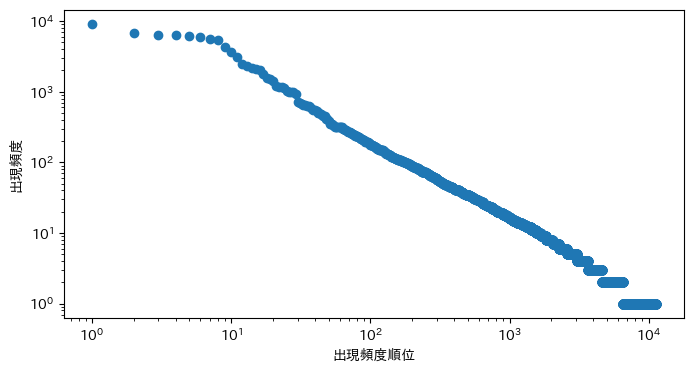

In [ ]:
import math

ans = defaultdict(int)
for morph in morphs:
  if morph['pos'] != '記号':
    ans[morph['base']] += 1
ans = sorted(ans.items(), key=lambda x: x[1], reverse=True)

ranks = [r + 1 for r in range(len(ans))]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 4))
plt.scatter(ranks, values)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.show()